In [386]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

---

# Algal Blooms in Alaska

#### By: Seth Chairez and Sophia Magcale

------

## Abstract

Our project explores algal blooms and its potential dangers. We specifically focus on the algae Alexandrium Catenella in the oceans surrounding northern Alaska. We first analyze the concentrations of the algae, in their cyst and cell forms, and how factors like temperature and salinity may affect these numbers. We then take these findings and consider how it may affect the food web/chain, considering how the algae may accumulate in sea life which is then consumed as seafood.

---

## Introduction and Background

In our initial proposal, we were aiming to study the concentrations of different man-made chemicals in various areas of the ocean surrounding the United States, and how these could possible contribute to the health of marine life and the nearby human population. After doing some exploratory analysis in our initial dataset, we found that the three chemicals/compounds that researchers took the most samples of were organic carbon, pentachlorobuphenyl, and phosphated pesticides.

We did some further research in how each of these three substances can affect human/marine life and we were mostly interested in the effects of phosphated pesticides. Algae feeds off of phosphorus, so when phosphorus enters the marine ecosystem then the algae population increases rapidly. Phosphorus is commonly used in pesticides, and "phosphated pesticides" tend to enter the ocean through runoff pollution. This leads into what is known as an algal bloom. 

We found a dataset that contained information specifically about the algae called Alexandrium Catenella, but it did not have any data pertaining to phosphated pesticides or any other chemicals. We were still very interested in the topic of algal blooms, so our questions shifted to reflect this new dataset. We now wanted to explore if there was a certain set of environmental conditions that allowed Alexandrium Catenella to thrive, if there are certain areas that seem to be at risk for an algal bloom, and how this could potentially affect marine and human life. 

We found two datasets, one with samples that collected Alexandrium cells and one with samples that collected Alexandrium cysts. To understand the difference between the two, it is important to have a sense of the life cycle of Alexandrium Catenella. The algae begins as a cyst that can remain in a dormant stage for a long period of time, meaning that it can survive despite unfavorable environmental conditions or starvation. Once environmental conditions are good, the cyst becomes an "active cell" that can asexually reproduce by repeatedly splitting in half. If conditions become unfavorable again, the cells fuse to become dormant cysts.

Alexandrium Catenella produces the compound saxitoxin, or STX for short. STXs are known for bioaccumulating in fish and shellfish, meaning that its concentration within these organisms builds up over a period of time. This is because the compound metabolizes/breaks down slower than it accumulates. Although STXs may not immediately kill the fish/shellfish that they accumulate in, they can cause serious harm to humans who consume seafood. Specifically, STXs are known to cause PSP, short for Paralytic Shellfish Poisoning. Symptoms can develop within minutes or it can take up to a few hours. Symptoms include tingling in the fingers and toes, fever, abdominal pain, nausea, vomitting, and numbness/paralysis of the limbs. Muscles in the chest and abdomen may also be paralyzed which can cause death because of inability to breathe. 

To draw connections between these algal blooms and its impact on humans, we found a third dataset with information about seafood sales in Alaska. Alaska is known for being a big source of seafood so it is worth knowing how much seafood it produces and sells, but also specifically what kind of seafood it produces and sells. We are most interested in shellfish, but STXs can accumulate in other fish as well which increases the risk of PSP.

---

## Data Used

Our Alexandrium Catenella datasets were taken from the Arctic Data Center on: 

https://arcticdata.io/catalog/view/doi:10.18739/A2RF5KG8J

https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2N87313M


The data was collected and organized by The Woods Hole Oceanographic Institution, Northwest Fisheries Science Center, Chesapeake Biological Laboratory, and Hokkaido University, and published by the NSF Arctic Data Center. Samples were collected in the Northern Bering Sea, Chukchi Shelf, and Beaufort Shelf, the ocean surrounding the northwestern coast of Alaska. Cruises would sail out to a variety of sites across these oceans, which allowed a wider range of the ocean to be covered. For the cells, researchers would collect 2-liter samples. For the cysts, researchers would collect sediment samples. These samples were processed in a laboratory and analyzed for cell/cyst abundance.



The Commercial Fishery Seafood Products dataset was taken from the Alaska Commercial Operator's Annual Reports on:

https://knb.ecoinformatics.org/view/doi%3A10.5063%2FF1T43RB0#urn%3Auuid%3A24f17557-ec07-466b-9003-1977d27f819d

The dataset was created by the Alasks Department of Fish and Game, Commercial Fisheries Entry Commission. The data covers the entire state of Alaska. An annual report is required to be filed, which includes purchasing and processing activities. The report is filed by the first buyer of raw fish, the people who catch and process the fish, the people who get the fish caught and processed by another business, and the first exporter of a fishery resource. 

### Cell Dataset

In [391]:
# Cell dataset

In [392]:
# cell.shape for number of observations and variables

In [393]:
# cell.keys for variable names
# description for each variable

In [394]:
# cell dataset with columns that matter

In [395]:
# cell.describe for statistics

In [396]:
# any other descriptive analysis for the cell dataset

In [397]:
# This is the dataset specifically for the Alexandrium cysts.
DFcystsraw = pd.read_csv('cysts.csv')
show(DFcystsraw)

### Cysts Dataset

In [398]:
# There are 185 observations and 9 variables for the cysts dataset.
DFcystsraw.shape

(185, 9)

In [399]:
# The variable names are listed below. 
DFcystsraw.keys()

Index(['CRUISE', 'STATION_ID', 'LAYER_CM', 'DATE', 'LAT', 'LON',
       'ALEXANDRIUM_CYSTS_CC', 'PDALEI_CYSTS_CC', 'SCRIPPS_CYSTS_CC'],
      dtype='object')

'CRUISE' is the identification code for the cruise ships that traveled out into the ocean.

'STATION_ID' is the station identification, the site at which samples were collected.

'LAYER_CM' is the depth (in centimeters) of the sediment that was collected for the sample. 0-3 means that the top 3 centimeters of sediment were collected

'DATE' is the date when the sample was collected

'LAT' is the latitude in decimal degrees of the sample that was collected

'LON' is the longitude in decimal degrees of the sample that was collected

'ALEXANDRIUM_CYSTS_CC' is the concentration of Alexandrium catenella in units of cysts per cubic centimeter

'PDALEI_CYSTS_CC' is the concentration of Pentapharsodinium dalei in units of cysts per cubic centimeter

'SCRIPPS_CYSTS_CC' is the concentration of Scrippsiella in units of cysts per cubic centimeter

In [401]:
# Show a dataframe with the most important columns
# I only included the Alexandrium column because we are not analyzing Pdalei or Scripps
cystscolumns = ['CRUISE','DATE','LAT','LON','ALEXANDRIUM_CYSTS_CC']
DFcysts = DFcystsraw[cystscolumns]
show(DFcysts)

In [402]:
# Do some descriptive analysis and talk about the results
DFcysts.describe()

,LAT,LON,ALEXANDRIUM_CYSTS_CC
count,185.000000,185.000000,185.000000
mean,69.261931,-162.548866,886.248649
std,3.088953,7.083803,2311.572506
min,61.000200,-175.215300,0.000000
25%,67.677000,-167.491500,36.000000
50%,70.555000,-164.996300,209.000000
75%,71.480500,-157.801800,621.000000
max,74.286700,-139.299800,17602.000000


The ALEXANDRIUM_CYSTS_CC column is the one with the most meaningful statistics. The minimum abundance of cysts observed was 0 cysts. The maximum abundance was 17602 cysts per cubic centimenter. 

In [404]:
DFcysts.groupby(by=['CRUISE']).count()

,DATE,LAT,LON,ALEXANDRIUM_CYSTS_CC
CRUISE,,,,
HLY1801,48,48,48,48
HLY1803,26,26,26,26
HLY1901,56,56,56,56
NBS2019,17,17,17,17
OS19-01,38,38,38,38


In order of most to least samples taken:

The HLY1901 cruise took 56 samples, the HLY1801 cruise took 48 samples, the OS19-01 took 38 samples, the HLY1803 cruise took 26 samples, and the NBS2019 cruise took 17 samples.

### Seafood Dataset

In [406]:
# This is the dataset specifically for the commercial fishery seafood products.
DFseafoodraw = pd.read_csv('Total_wholesale.csv')
show(DFseafoodraw)

In [407]:
# There are 7190 observations and 9 variables for the seafood dataset.
DFseafoodraw.shape

(7190, 9)

In [408]:
# The variable names are listed below. 
DFseafoodraw.keys()

Index(['SpeciesGroup', 'SpeciesName', 'OperationYear', 'AreaName',
       'SpeciesCode', 'CompanyCount_taxID', 'TotalNetWeight',
       'TotalWholesaleValue', 'WholesalePricePerlb'],
      dtype='object')

'SpeciesGroup' is the general name for the species recorded.

'SpeciesName' is the specific name for the species recorded.

'OperationYear' is year the fishery caught the species.

'AreaName' is the area in Alaska where production and purchasing occured.

'SpeciesCode' is the code for the species recorded.

'CompanyCount_taxID' is the amount of companies that processed the species in that specific area and specific year 

'TotalNetWeight' is the total net weight in pounds of the seafood

'TotalWholesaleValue' is the total U.S. wholesale dollar of the seafood

'WholesalePricePerlb' is the average wholesale U.S. dollar per pound of the seafood

In [410]:
# Show a dataframe with the most important columns
seafoodcolumns = ['SpeciesGroup','OperationYear','AreaName','TotalNetWeight','TotalWholesaleValue','WholesalePricePerlb']
DFseafood = DFseafoodraw[seafoodcolumns]
show(DFseafood)

In [411]:
# Do some descriptive analysis and talk about the results
DFseafood.describe()

,OperationYear,TotalNetWeight,TotalWholesaleValue,WholesalePricePerlb
count,7190.000000,7.190000e+03,7.190000e+03,7190.000000
mean,1999.693880,7.809981e+06,1.178979e+07,2.726312
std,8.780386,3.733516e+07,4.753847e+07,2.386776
min,1984.000000,1.000000e+01,4.000000e+00,0.000000
25%,1993.000000,4.465925e+04,8.726225e+04,1.060000
50%,1999.000000,5.120860e+05,1.280090e+06,1.970000
75%,2007.000000,3.200561e+06,6.809778e+06,3.627500
max,2016.000000,6.212411e+08,8.095256e+08,20.890000


The data was collected in between the years 1984 and 2016. The minimum total net weight recorded was 10 pounds, and the greatest total net weight recorded was 621,241,100 pounds. The minimum total wholesale value recorded was 4 dollars, and the greatest total wholesale value recorded was 809,525,600 dollars. The minimum wholesale price per pound was 0 dollars, and the greatest wholesale price per pound was 20.89 dollars.

In [413]:
DFseafood.groupby(by=['SpeciesGroup']).sum()

,OperationYear,AreaName,TotalNetWeight,TotalWholesaleValue,WholesalePricePerlb
SpeciesGroup,,,,,
Kamchatka flounder,2012,EEZ,6082138,6108662,1.00
Missing Value or salmon byproducts,9971,Cook InletEEZJuneau/YakutatSitka/PelicanSitka/...,278703,605709,7.88
abalone,35807,Sitka/PelicanKetchikan/CraigSitka/PelicanKetch...,331601,3036613,171.48
bocaccio,12014,Ketchikan/CraigJuneau/YakutatSitka/PelicanSitk...,1352,2047,9.87
clam,78092,Cook InletKodiakPrince William SoundCook Inlet...,9588745,60161118,195.29
cod,594151,Bering SeaCook InletDutch HarborKodiakPrince W...,5729709156,7468369923,410.00
crab,1254359,Adak/West AleutiansAdak/West AleutiansBering S...,2515654892,9237274052,3530.82
flatfish,19920,EEZEEZKodiakKodiakDutch HarborEEZEEZKodiakKodi...,28503661,33090231,11.74
flounder,236125,EEZEEZKodiakPetersburg/WrangellBering SeaBerin...,559179225,320146955,85.98


In this analysis, the columns that give us the most important information is the sums for Total Net Weight and Total Wholesale Value. It is grouped by species, so we see the total weight and total wholesale value with respect to each species. 

---

## Exploratory Data Analysis

Show a few plots or some data tables that help your reader understand your data better. What are some initial questions that you were able to quickly answer? How do those questions lead you to a deeper analysis?

This section will have some code. Make sure to use Markdown cells to explain what the code is demonstrating

### Alexandrium Cells

In [565]:
# exploratory data analysis for cells

### Alexandrium Cysts

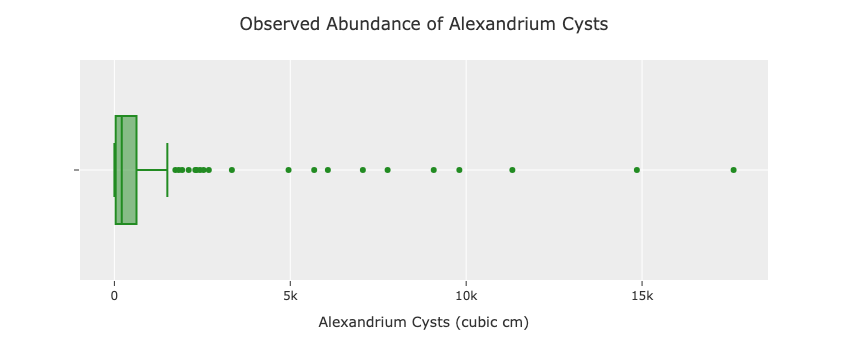

In [556]:
# Using a box plot to show the distribution of Alexandrium cysts abundance

fig = px.box(DFcysts, 
             x="ALEXANDRIUM_CYSTS_CC")

fig.update_layout(title='Observed Abundance of Alexandrium Cysts',
                  title_x=0.5,
                  xaxis_title = 'Alexandrium Cysts (cubic cm)',
                  template = 'ggplot2',
                autosize=True)

fig.update_traces(marker=dict(color='forestgreen'))

fig.show()

The box plot above shows that most of the data lies in a range between 0-1505 cysts. However, it also shows noteworthy outliers. There are some points clustered between 1733-2684 cysts and more points ranging anywhere between 5k-17.602k cysts. It is worth looking more into these outliers like where they are geographically located and what environmental conditions may lead to an algal bloom in these areas. 

### Seafood Production and Sales

In [421]:
show(DFseafood)

In [620]:
# Masking for year 2000 and later 
mask1 = (DFseafood['OperationYear']>=2010)
DFseafoodmasked1 = DFseafood[mask1]
show(DFseafoodmasked1)

In [622]:
# Doing a value counts to see which species has the most observations in years 2000 and later
DFspeciescount = DFseafoodmasked1['SpeciesGroup'].value_counts()
show(DFspeciescount)

This data table shows that rockfish, salmon, crab, sole, halibut, cod, sablefish (blackcod), shrimp, skate, and lingcod are the 10 most observed species. Because we also care about shellfish other than crab, it is also worth considering clams and scallops. 

In [625]:
# Doing a value counts to see which areas has the most observations in years 2000 and later
DFareacount = DFseafoodmasked1['AreaName'].value_counts()
show(DFareacount)

This data table shows that Kodiak, EEZ, Sitka/Pelican, Juneau/Yakutat, Ketchikan/Craig, Cook Inlet, Petersburg/Wrangell, Prince William Sound, Dutch Harbor, and Alaska Peninsula are the top 10 areas with the most observations. 

Because the Alexandrium cyst and cell data were collected near the Bering Sea, it is also worth considering the Bering Sea in later analysis.

In later analysis, we will mask out EEZ, Yukon, Chignik, Norton Sound, and Kuskokwim. EEZ covers all the areas near Alaska waters, so if it was included it would throw off the data and graphs. Since we are throwing out EEZ, we will include Bristol Bay which was the 11th most observed area. The other areas don't have enough observations to be worth visualizing 

---

## Proposed Questions

What specific questions are you going to explore and present in the rest of the paper? Give a very brief overview of what you are going to do to answer those questions. Imagine this as a road map so your reader knows what to expect.

- How are Alexandrium cells geographically distributed throughout the sample sites? How are the cysts distributed? Are there some places with more cells/cysts than other?
- Are there certain environmental conditions that clearly lead to an Alexandrium algal bloom?
- How much shellfish is circulating through the seafood industry? Is it a considerable amount compared to the top 10 species of seafood that were identified earlier? Based on these findings, is PSP a big risk to humans who eat seafood?

---

## Analysis and Results

Here is where you show your code and results (plots, tables, predictions, etc) that help to explore and answer your questions. There should be code here that can be run to reproduce your results and conclusions. After each plot/table/final number, you should add a Markdown cell where you explain to the reader what the result means and how/why it answers the question.

This section will have Lots of code. Make sure to use Markdown cells to explain what the code is demonstrating

### How are Alexandrium cells geographically distributed throughout the sample sites?

In [572]:
# Cells map

In [574]:
# Explanation

### How are Alexandrium cysts geographically distributed throughout the sample sites?

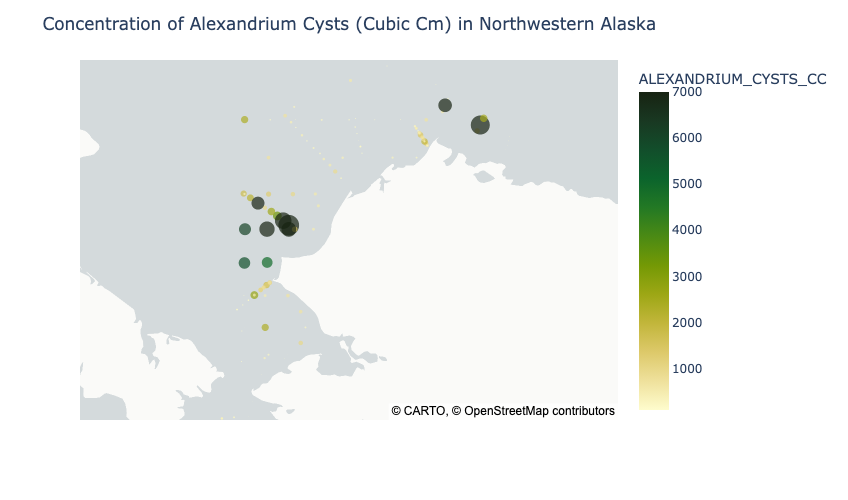

In [627]:
fig = px.scatter_map(DFcysts, 
                     lat="LAT", 
                     lon="LON",    
                     color="ALEXANDRIUM_CYSTS_CC", #colors based on the magnitude of number of cysts
                     size="ALEXANDRIUM_CYSTS_CC", #sets the size of a point based on the magnitude of number of cysts
                  color_continuous_scale= 'speed', #sets the color scheme
                     size_max=15, #sets the max size a point can get
                     zoom=3.5, #sets how zoomed in the map is
                     range_color=[100,7000], #anything below 100cc is light yellow, anything above 7000 is dark green, any values in between are a hue between light yellow and dark green
                     height=500)
fig.update_layout(map_style="light",
                 map_center_lon=-162, #sets the center of the map at longitude -162
                 title='Concentration of Alexandrium Cysts (Cubic Cm) in Northwestern Alaska')
fig.show()

This map shows the concentration of Alexandrium cysts in the oceans surrounding the northwestern parts of Alaska. The darker the green and the bigger the point, the more Alexandrium cysts are in that particular area. With this, we can infer that these areas are at the greatest risk for algal blooms.

### Are there certain environmental conditions that lead to an Alexandrium bloom?

In [579]:
# graph about temperature and salinity

In [581]:
# explanation

### How much shellfish is circulating through the seafood industry in Alaska?

Kodiak, Bristol Bay, Sitka/Pelican, Juneau/Yakutat, Ketchikan/Craig, Cook Inlet, Petersburg/Wrangell, Prince William Sound, Dutch Harbor, and Alaska Peninsula

In [629]:
# Masking for certain species
maskspecies = (DFseafoodmasked1['SpeciesGroup']=='rockfish') | (DFseafoodmasked1['SpeciesGroup']=='salmon') | (DFseafoodmasked1['SpeciesGroup']=='crab') | (DFseafoodmasked1['SpeciesGroup']=='sole') | (DFseafoodmasked1['SpeciesGroup']=='halibut') | (DFseafoodmasked1['SpeciesGroup']=='cod') | (DFseafoodmasked1['SpeciesGroup']=='sablefish (blackcod)') | (DFseafoodmasked1['SpeciesGroup']=='shrimp') | (DFseafoodmasked1['SpeciesGroup']=='skate') | (DFseafoodmasked1['SpeciesGroup']=='lingcod') | (DFseafoodmasked1['SpeciesGroup']=='clam') | (DFseafoodmasked1['SpeciesGroup']=='scallop')
DFseafoodmasked = DFseafoodmasked1[maskspecies]
# Masking for top 10 areas as described in the explanatory analysis
maskarea = (DFseafoodmasked['AreaName']=='Kodiak') | (DFseafoodmasked['AreaName']=='Bristol Bay') | (DFseafoodmasked['AreaName']=='Sitka/Pelican') | (DFseafoodmasked['AreaName']=='Juneau/Yakutat') | (DFseafoodmasked['AreaName']=='Ketchikan/Craig') | (DFseafoodmasked['AreaName']=='Cook Inlet') | (DFseafoodmasked['AreaName']=='Petersburg/Wrangell') | (DFseafoodmasked['AreaName']=='Prince William Sound') | (DFseafoodmasked['AreaName']=='Dutch Harbor') | (DFseafoodmasked['AreaName']=='Alaska Peninsula') | (DFseafoodmasked['AreaName']=='Bering Sea')
DFseafoodmaskedfinal = DFseafoodmasked[maskarea]
show(DFseafoodmaskedfinal)

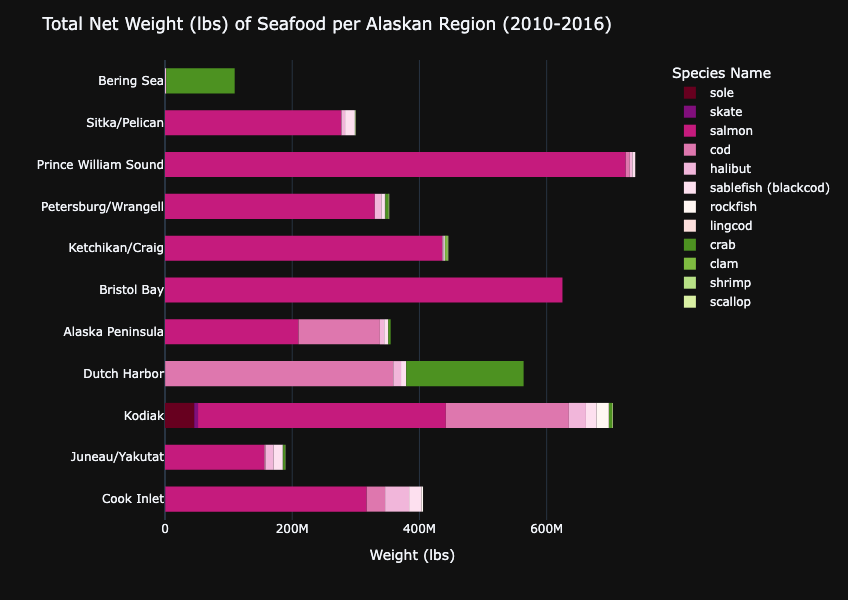

In [645]:
fig = px.histogram(DFseafoodmaskedfinal,
                y = 'AreaName',
                   x = 'TotalNetWeight',
                  color = 'SpeciesGroup',
                  color_discrete_map = {'rockfish':'#fff7f3',
                                        'salmon':'#c51b7d',
                                       'cod':'#de77ae',
                                       'halibut':'#f1b6da',
                                       'sablefish (blackcod)':'#fde0ef',
                                        'sole':'#67001f',
                                       'crab':'#4d9221',
                                       'shrimp':'#b8e186',
                                       'clam':'#7fbc41',
                                       'scallop':'#d9f0a3',
                                       'skate':'#810f7c',
                                       'lingcod':'#fde0dd'},
                  category_orders={'SpeciesGroup' : ['sole', 
                                                     'skate',
                                                     'salmon',
                                                     'cod', 
                                                     'halibut', 
                                                     'sablefish (blackcod)',
                                                     'rockfish',
                                                    'lingcod',
                                                    'crab',
                                                    'clam',
                                                    'shrimp',
                                                     'scallop']})


fig.update_layout(title='Total Net Weight (lbs) of Seafood per Alaskan Region (2010-2016)',
                  xaxis_title="Weight (lbs)",
                  yaxis_title = ' ',
                  template='plotly_dark',
                  legend_title='Species Name',
                  bargap = 0.4,
                  autosize=False,
                  width=800,
                  height=600)

fig.show()

The histogram above shows the total weight of seafood production that was reported by each Alaskan region. Prince William Sound produced the most seafood (in terms of weight) while the Bering Sea produced the least. 

The histogram is colored by SpeciesName to show the specific species that each area is producing. For most areas, except the Bering Sea and the Dutch Harbor, salmon was mainly produced. The Bering Sea mainly produced crab and the Dutch Harbor produced mainly cod with a considerable amount of crab. 

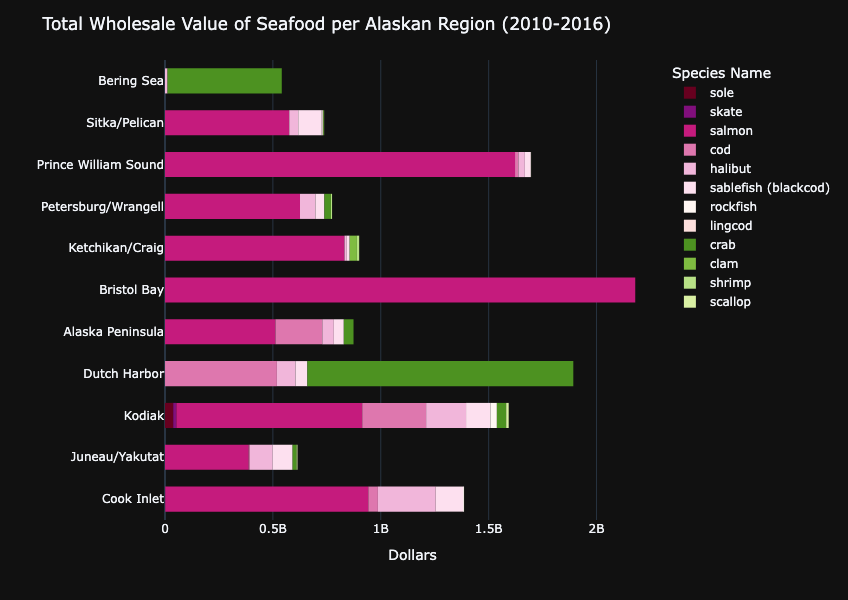

In [643]:
fig = px.histogram(DFseafoodmaskedfinal,
                y = 'AreaName',
                   x = 'TotalWholesaleValue',
                  color = 'SpeciesGroup',
                  color_discrete_map = {'rockfish':'#fff7f3',
                                        'salmon':'#c51b7d',
                                       'cod':'#de77ae',
                                       'halibut':'#f1b6da',
                                       'sablefish (blackcod)':'#fde0ef',
                                        'sole':'#67001f',
                                       'crab':'#4d9221',
                                       'shrimp':'#b8e186',
                                       'clam':'#7fbc41',
                                       'scallop':'#d9f0a3',
                                       'skate':'#810f7c',
                                       'lingcod':'#fde0dd'},
                  category_orders={'SpeciesGroup' : ['sole', 
                                                     'skate',
                                                     'salmon',
                                                     'cod', 
                                                     'halibut', 
                                                     'sablefish (blackcod)',
                                                     'rockfish',
                                                    'lingcod',
                                                    'crab',
                                                    'clam',
                                                    'shrimp',
                                                     'scallop']})


fig.update_layout(title='Total Wholesale Value of Seafood per Alaskan Region (2010-2016)',
                  xaxis_title="Dollars",
                  yaxis_title = ' ',
                  template='plotly_dark',
                  legend_title='Species Name',
                  bargap = 0.4,
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

The histogram above shows the total wholesale value that each Alaskan region produced from seafood. Bristol Bay reported the most money while the Bering Sea reported the least.

The histogram is again colored by SpeciesName to show which specific species each region is making money off of. It appears that the Bering Sea and the Dutch Harbor are making a considerable amount of money off of crab. Other places like Petersburg/Wrangell, Ketchikan/Craig, the Alaska Peninsula, Kodiak, and Juneau/Yakutat also make some money off of crab and other shellfish.

In [593]:
# line plot that plots total net weight vs. total wholesale value, colored by species

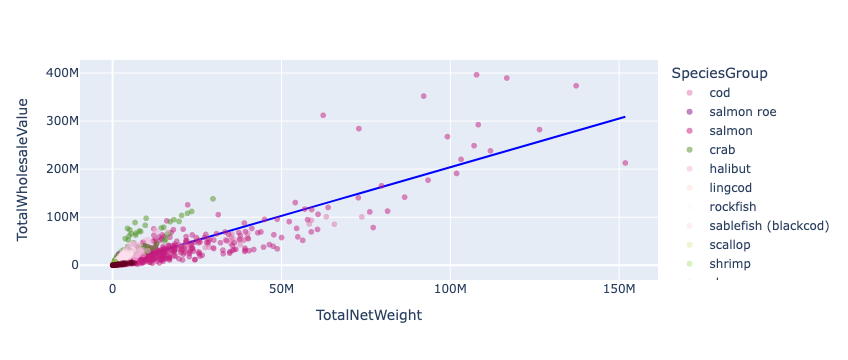

In [613]:
fig = px.scatter(DFseafoodmaskedfinal,
                 x='TotalNetWeight',
                 y="TotalWholesaleValue",
                 color= 'SpeciesGroup',
                 color_discrete_map = {'rockfish':'#fff7f3',
                                        'salmon':'#c51b7d',
                                       'cod':'#de77ae',
                                       'halibut':'#f1b6da',
                                       'sablefish (blackcod)':'#fde0ef',
                                        'sole':'#67001f',
                                       'crab':'#4d9221',
                                       'shrimp':'#b8e186',
                                       'clam':'#7fbc41',
                                       'scallop':'#d9f0a3',
                                       'salmon roe':'#810f7c',
                                       'lingcod':'#fde0dd'},
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue',
                opacity = 0.5)

fig.show()

## Conclusion

Give a brief statement about what you achieved in your analysis, what issues or limitations your analysis contains, a conversation of any ethical concerns with the data or analysis, and some possible future directions (if you had more time an money to keep going).